# Predicting heart disease using machine learning 

This notebook looks into using various Python-based machine learning and data science libraries
in an attempt to build machine learning model capable of predicting whether or not someone has heart disease based on medical attributes. 

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experimentation

## 1. Problem Definition
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data 

The original data came from the Cleveland data from the UCI Machine learning Repository. [Cleveland Database](https://archive.ics.uci.edu/ml/datasets/heart+Disease)

There is also a version of it available on Kaggle. [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci)

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease 
during a proof of concept, we'll pursue the project

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary**

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Preparing tools

We're going to use pandas, Matplotlib and Numpy for data analysis and manipulation.


In [3]:
#Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#we want our plot to appear inside the notebook
%matplotlib inline 

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score
from sklearn.metrics import plot_roc_curve

# Load data

In [4]:
df = pd.read_csv("data/heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

# Data Exploration  (exploratory data analysis or EDA)

The goal here is to find more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What is missing from the data and how do you deal with it?
4. What are the outliers and why should we care about them?
5. How can you add, change or remove features to get more out of your data?

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [12]:
#Finding out the number of class there are
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [23]:
for i in df.columns:
    print(f"\n{i, df[i].value_counts()}")
    print()


('age', 58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64)


('sex', 1    207
0     96
Name: sex, dtype: int64)


('cp', 0    143
2     87
1     50
3     23
Name: cp, dtype: int64)


('trestbps', 120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1


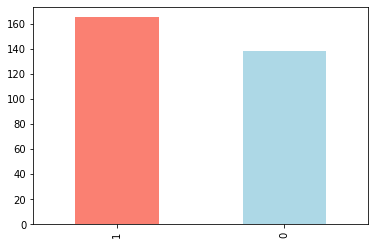

In [25]:
df["target"].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"]);

In [27]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [28]:
#Are there missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [29]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [35]:
df.describe(percentiles = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.44, 0.56, 0.88, 0.92])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,35.000000,0.000000,0.000000,100.000000,149.000000,0.000000,0.000000,95.020000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2%,35.080000,0.000000,0.000000,101.040000,160.160000,0.000000,0.000000,97.080000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
3%,38.000000,0.000000,0.000000,104.060000,167.060000,0.000000,0.000000,103.120000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4%,39.000000,0.000000,0.000000,105.080000,172.160000,0.000000,0.000000,105.080000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
5%,39.100000,0.000000,0.000000,108.000000,175.000000,0.000000,0.000000,108.100000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
6%,40.120000,0.000000,0.000000,108.000000,177.000000,0.000000,0.000000,111.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [36]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Heart Disease Frequency according to Sex

In [37]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [38]:
#Compare target column with the sex column 

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


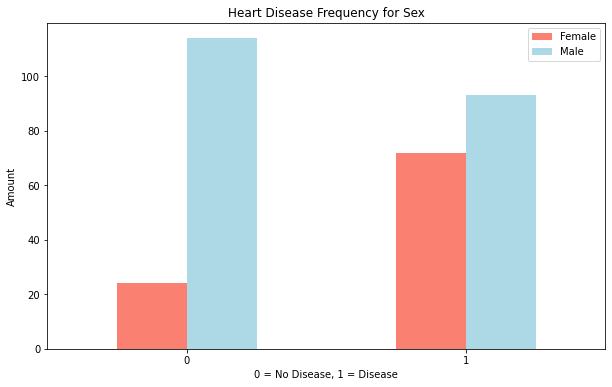

In [42]:
#Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind = "bar",
                                    figsize = (10, 6),
                                    color = ["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease") 
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0);

### Age vs. Max Heart Rate for Heart Disease


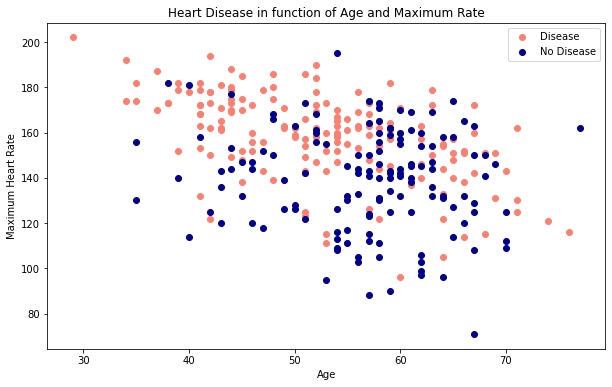

In [50]:
#Create another figure
plt.figure(figsize = (10, 6))

#Scatter with positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c = "salmon");

#Scatter with negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = "darkblue")

#Add some helpful info
plt.title("Heart Disease in function of Age and Maximum Rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.legend(["Disease", "No Disease"]);

Histogram is the best way to check the distribution or spread of data. 
Mostly used to check outliers

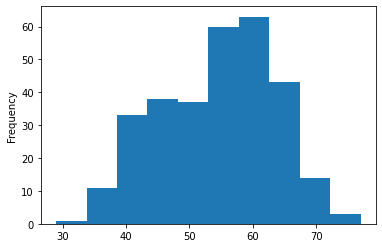

In [53]:
#Check the distribution of the age column with a histogram
df.age.plot.hist();

In [76]:
pd.crosstab(df["target"], df["sex"])


sex,0,1
target,,
0,24,114
1,72,93


In [69]:
df[df.target==0].target

165    0
166    0
167    0
168    0
169    0
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 138, dtype: int64

In [83]:
df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

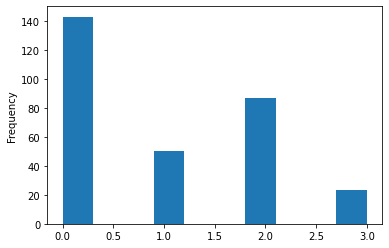

In [80]:
df["cp"].plot(kind = "hist");

### Heart Disease Frequency per Chest pain type

3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
 

In [85]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


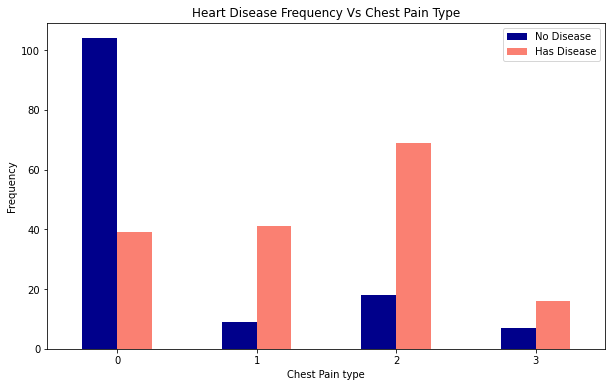

In [93]:
#Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind = "bar",
                                   figsize = (10, 6),
                                    color = ["darkblue", "salmon"],
                                    )

plt.legend(["No Disease", "Has Disease"])
plt.xlabel("Chest Pain type")
plt.ylabel("Frequency")
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xticks(rotation = 0);

In [5]:
# Make a correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


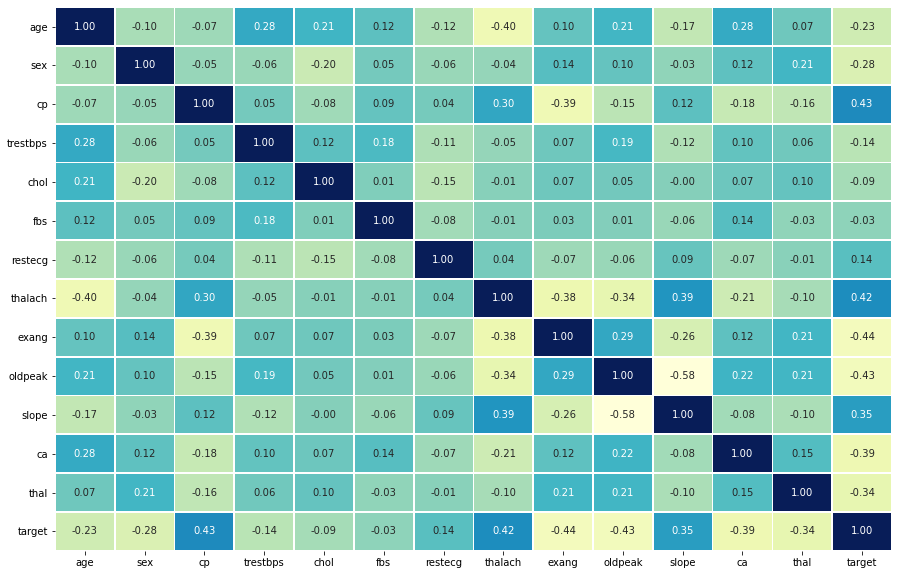

In [13]:
# Make our correlation more visual 
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.7,
                 fmt = ".2f",
                 cmap = "YlGnBu",
                 cbar = False);

In [8]:
pd.crosstab(df.exang, df.target)

target,0,1
exang,,
0,62,142
1,76,23


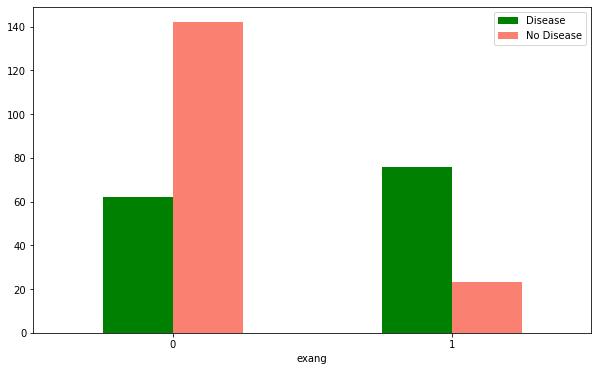

In [10]:
pd.crosstab(df.exang, df.target).plot(kind = "bar", 
                                      figsize = (10, 6),
                                       color = ["green", "salmon"])
plt.xticks(rotation = 0)
plt.legend(["Disease", "No Disease"]);

## 5. Modelling

In [5]:
# Split data into X and y
X = df.drop("target", axis = 1)
y = df["target"]

In [6]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [8]:
#Split our data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [10]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier 


In [11]:
# Put models in a dictionary
models = {"Logistic Regression" : LogisticRegression(), 
          "KNN" : KNeighborsClassifier(), 
          "Random Forest" : RandomForestClassifier()}

#Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates machine learning models.
    models : a dict of different Scikit-Learn machine learning models.
    X_train : training data(no labels)
    X_test : testing data(no labels)
    y_train : training labels
    y_test : test labels
    """
    #Set random seed
    np.random.seed(42)
    #Make a dictionary to keep model scores 
    model_scores = { }
    #Loop through models 
    for name, model in models.items():
        #Fit model to the data 
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores 
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [12]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores

C:\Users\ACER\Desktop\sample_project1\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

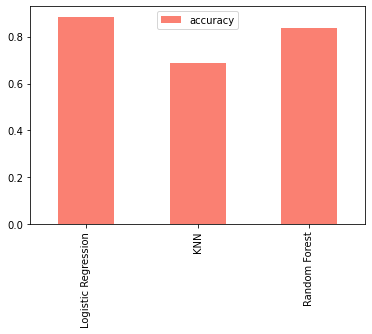

In [16]:
model_comparison = pd.DataFrame(model_scores, index = ["accuracy"])
model_comparison.T.plot(kind = "bar", color = ["salmon"]);

Let's look at the following:

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area Under the Curve (AUC)

## Hyperparameter tuning by hand


In [53]:
# Tuning KNN
train_scores = [ ]
test_scores =  [ ]

#Create a list of different values for n_neighbors
neighbors = range(1, 21)

#Setup KNN instance
knn = KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    #Fit the algorithm
    knn.fit(X_train, y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [54]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [55]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data is 75.41%


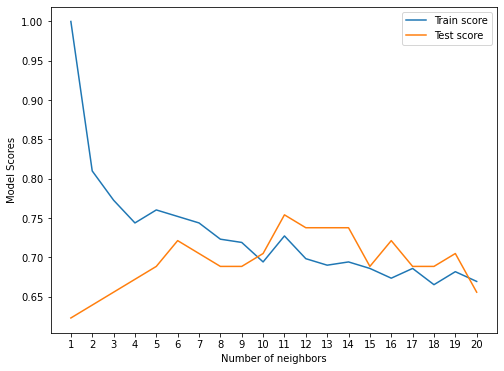

In [63]:
plt.figure(figsize = (8, 6))
plt.plot(neighbors, train_scores, label = "Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.legend()
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Scores")

print(f"Maximum KNN score on the test data is {max(test_scores)*100:.2f}%");

## Hyperparameter tuning using RandomizedSearchCV

We're going to tune :
* LogisticRegression
* RandomForestClassifier

 ... using RandomizedSearchCV

In [17]:
# Create a hyperparameter grid for LogisticRegression

log_reg_grid = {"C" : np.logspace(-4, 4, 20),
                "solver" :["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10,1000, 50 ), 
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)
          }


In [18]:
# Tune LogisticRegression

np.random.seed(42)

#Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                param_distributions = log_reg_grid,
                                cv = 5,
                                verbose = True,
                                n_iter = 20
                               )

#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [19]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [20]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [21]:
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions = rf_grid,
                                cv = 5,
                                verbose = True,
                                n_iter = 20
                               )

#Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [22]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [36]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameter tuning using GridSearchCV

Since our LogisticRegression provides us with the best score, we will try and improve it using GridSearchCV.. 

In [37]:
# Different hyperparameters for our LogisticRegression model

log_reg_grid = {"C" : np.logspace(-4, 4, 30), 
                "solver" : ["liblinear"]}

#Setup Grid hyperparameter Search for our LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(), 
                          param_grid = log_reg_grid, 
                          cv = 5, 
                          verbose = True )

# Fit the model
gs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.7s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
#Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [40]:
#Evaluate our Grid Search LogisticRegression model

gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [41]:
y_preds = gs_log_reg.predict(X_test)

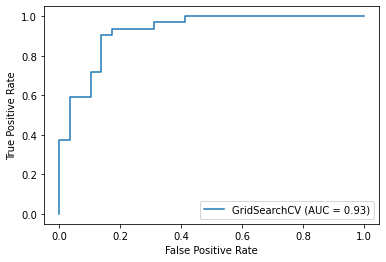

In [44]:
#ROC curve
plot_roc_curve(gs_log_reg, X_test, y_test);

In [46]:
#Confusion matrix 
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


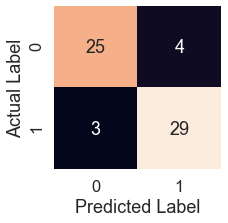

In [57]:
#Making the confusion matrix more visual 
sns.set(font_scale = 1.5)

def plot_conf_matrix(y_test, y_preds):
    """
    Plots confusion matrix using seaborn's heatmap
    given the true labels and predicted labels
    
    """
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
                                      annot = True,
                                      cbar = False)
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    
plot_conf_matrix(y_test, y_preds)

In [58]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculating evaluation metrics using cross-validation 

In [59]:
# Check best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [60]:
# Create a new classifier with best hyperparameters 
clf = LogisticRegression(C = 0.20433597178569418, 
                         solver = "liblinear" )

In [65]:
#Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X, 
                         y, 
                         scoring = "accuracy", 
                         cv = 5)
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [67]:
cv_acc = np.mean(cv_acc)

cv_acc

0.8479781420765027

In [78]:
#Cross-validated precision
cv_precision = cross_val_score(clf, 
                          X,
                          y, 
                          scoring = "precision", 
                          cv = 5)



cv_precision = np.mean(cv_precision)
cv_precision


0.8215873015873015

In [79]:
#Cross-validated recall
cv_recall = cross_val_score(clf, 
                          X,
                          y, 
                          scoring = "recall", 
                          cv = 5)

cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [80]:
#Cross-validated f1_score
cv_f1 = cross_val_score(clf, 
                          X,
                          y, 
                          scoring = "f1", 
                          cv = 5)

cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

Text(0, 0.5, 'Score')

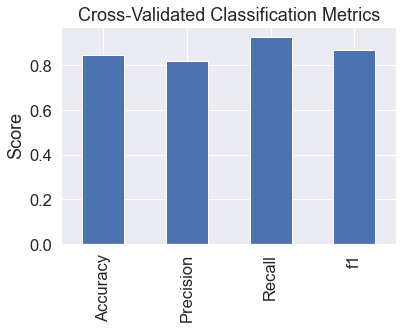

In [94]:
# Visualise our Evaluation metrics

cv_metrics = pd.DataFrame({"Accuracy" : cv_acc, 
                           "Precision" : cv_precision,
                           "Recall" : cv_recall,
                           "f1" : cv_f1}, index = [0])
cv_metrics.T.plot.bar(title = "Cross-Validated Classification Metrics", legend = False)
plt.ylabel("Score")

## Feature Importance 

Trying to figure out which features contributed most to the outcome of the model and how much they contributed

* Finding the feature importance of our `LogisticRegression` model

In [99]:
# Fit an instance of LogisticRegression

gs_log_reg.best_params_

clf = LogisticRegression(C = 0.20433597178569418, 
                         solver = 'liblinear' )

clf.fit(X_train, y_train);

In [101]:
#Check coef_
clf.coef_    #How our features correlate to our target variables

array([[ 0.00316728, -0.86044635,  0.66067048, -0.01156993, -0.00166374,
         0.04386112,  0.31275834,  0.02459361, -0.60413071, -0.56862814,
         0.45051626, -0.63609889, -0.67663372]])

In [105]:
#Match coef's of features to columns

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672782921965824,
 'sex': -0.8604463545603078,
 'cp': 0.6606704813545083,
 'trestbps': -0.011569931686524986,
 'chol': -0.001663743615316917,
 'fbs': 0.043861119186527575,
 'restecg': 0.3127583405809992,
 'thalach': 0.024593612169467042,
 'exang': -0.6041307069682633,
 'oldpeak': -0.5686281432757914,
 'slope': 0.45051625714744153,
 'ca': -0.6360988914321564,
 'thal': -0.6766337224000031}

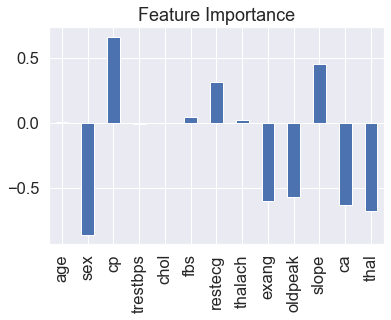

In [110]:
#Visualise feature importance 
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = "Feature Importance", legend = False);

`Sex` has the highest negative correlation which means as the value of sex increases, the target value also decreases

In [111]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


A higher proportion of females are more likely to get heart disease compared to Males from the data given.
There is a `75% chance that a female will get a heart disease` and a `45% chance that a Male will get heart disease` following
the predictions of our model on the given data

On the other hand, `cp` has the highest positive correlation with the target. 
People with higher values of `cp` are more likely to get heart disease(i.e target value increases)

cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [119]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


People with `chest type 0`(Typical angina) are less likely to get a heart disease. 
**They have a less than 30% chance of getting a heart disease**

## 6. Experimentation

Since we haven't reached our evaluation metric yet we might:
* Collect more data
* Try a better model. Like CatBoost or XGBoost
* Improve the current model(beyond what has been done so far)
